# student-performance-analysis-on-exam-scores

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploring Data Set

## Reading input file

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

In [ ]:
## Checking headers in file

In [84]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Lets see what kind of values have each column

In [85]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Initial checkup

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [87]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### So above information is only regarding numberic columns. No analysis on non-numberic columns

### We have seen distribution of columns having values in number(above graphs). Lets see non-numeric features

<Axes: xlabel='gender', ylabel='count'>

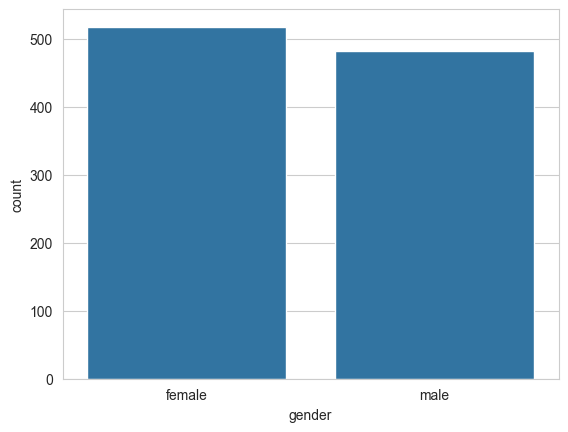

In [88]:
sns.countplot(x='gender',data=df)

<Axes: xlabel='race/ethnicity', ylabel='count'>

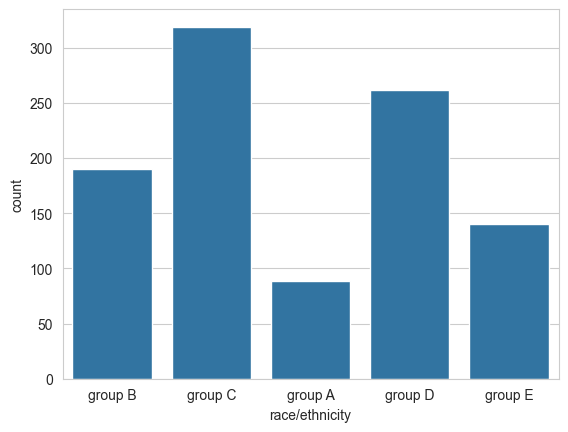

In [89]:
sns.countplot(x='race/ethnicity',data=df)

<Axes: xlabel='parental level of education', ylabel='count'>

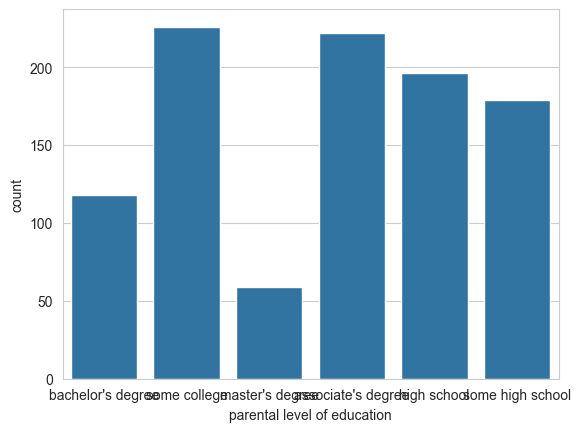

In [90]:
sns.countplot(x='parental level of education',data=df)

### The y-axis values in above graph are not clearly visible. Lets see the alternative to above.

In [91]:
a=df['parental level of education'].value_counts(normalize=True)*100
a

parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

<Axes: xlabel='parental level of education', ylabel='count'>

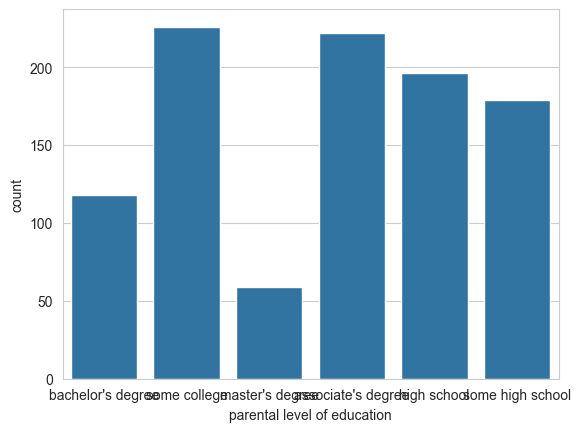

In [92]:
sns.countplot(df,x='parental level of education')

# Lets do some real time analysis

## Lets compare student score on the basis of test preparation score

In [93]:
df.groupby('test preparation course').count()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
test preparation course,,,,,,,
completed,358,358,358,358,358,358,358
none,642,642,642,642,642,642,642


<Axes: xlabel='lunch', ylabel='count'>

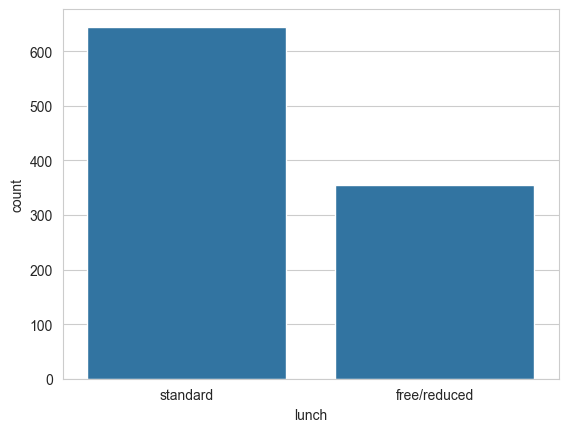

In [94]:
sns.countplot(df,x="lunch")
# it shows the histplot of age data

We can compare above the mean Math Score, Reading score and writing score is more for students who have taken the preparation test

## Lets compare student scores across ethnicity 

In [95]:
df1=df.groupby('race/ethnicity').describe()

In [96]:
df1

math score                                                 \
                    count       mean        std   min    25%   50%   75%   
race/ethnicity                                                             
group A              89.0  61.629213  14.523008  28.0  51.00  61.0  71.0   
group B             190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   
group C             319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   
group D             262.0  67.362595  13.769386  26.0  59.00  69.0  77.0   
group E             140.0  73.821429  15.534259  30.0  64.75  74.5  85.0   

                      reading score             ...                \
                  max         count       mean  ...    75%    max   
race/ethnicity                                  ...                 
group A         100.0          89.0  64.674157  ...  74.00  100.0   
group B          97.0         190.0  67.352632  ...  79.75   97.0   
group C          98.0         319.0  69.103448  ...  78.50  100.0   
group D         100.0         262.0  70.030534  ...  79.00  100.0   
group E         100.0         140.0  73.028571  ...  84.00  100.0   

               writing score                                                  \
                       count       mean        std   min    25%   50%    75%   
race/ethnicity                                                                 
group A                 89.0  62.674157  15.468278  19.0  51.00  62.0  73.00   
group B                190.0  65.600000  15.625173  15.0  55.25  67.0  78.00   
group C                319.0  67.827586  14.983378  10.0  57.00  68.0  79.00   
group D                262.0  70.145038  14.367707  32.0  61.00  72.0  80.00   
group E                140.0  71.407143  15.113906  22.0  62.00  72.0  80.25   

                       
                  max  
race/ethnicity         
group A          97.0  
group B          96.0  
group C         100.0  
group D         100.0  
group E         100.0  

[5 rows x 24 columns]

<Axes: xlabel='race/ethnicity', ylabel='math score'>

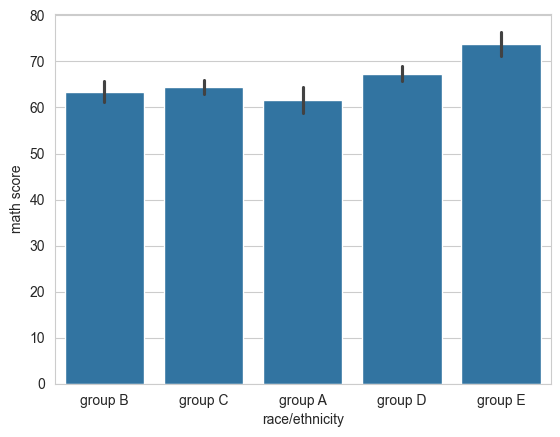

In [97]:
sns.barplot(df,x='race/ethnicity',y="math score")

<Axes: xlabel='race/ethnicity', ylabel='reading score'>

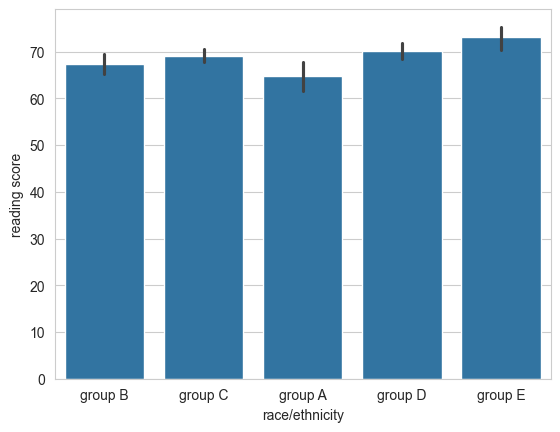

In [98]:
sns.barplot(df,x="race/ethnicity",y="reading score")

<Axes: xlabel='race/ethnicity', ylabel='writing score'>

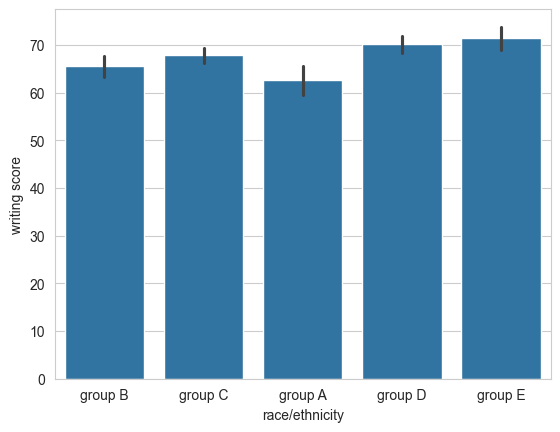

In [99]:
sns.barplot(df,x="race/ethnicity",y="writing score")

#### We can see in above that Group E students are topper in all 3 subject scores.

## Similarly we can do for parental level of education

In [100]:
df2=df.groupby('parental level of education').describe()
df2

math score                                     \
                                 count       mean        std   min    25%   
parental level of education                                                 
associate's degree               222.0  67.882883  15.112093  26.0  57.00   
bachelor's degree                118.0  69.389831  14.943789  29.0  61.00   
high school                      196.0  62.137755  14.539651   8.0  53.75   
master's degree                   59.0  69.745763  15.153915  40.0  55.50   
some college                     226.0  67.128319  14.312897  19.0  59.00   
some high school                 179.0  63.497207  15.927989   0.0  53.00   

                                               reading score             ...  \
                              50%   75%    max         count       mean  ...   
parental level of education                                              ...   
associate's degree           67.0  80.0  100.0         222.0  70.927928  ...   
bachelor's degree            68.0  79.0  100.0         118.0  73.000000  ...   
high school                  63.0  72.0   99.0         196.0  64.704082  ...   
master's degree              73.0  81.0   95.0          59.0  75.372881  ...   
some college                 67.5  76.0  100.0         226.0  69.460177  ...   
some high school             65.0  74.0   97.0         179.0  66.938547  ...   

                                          writing score                        \
                               75%    max         count       mean        std   
parental level of education                                                     
associate's degree           81.00  100.0         222.0  69.896396  14.311122   
bachelor's degree            82.75  100.0         118.0  73.381356  14.728262   
high school                  74.25   99.0         196.0  62.448980  14.085907   
master's degree              84.50  100.0          59.0  75.677966  13.730711   
some college                 79.75  100.0         226.0  68.840708  15.012331   
some high school             79.00  100.0         179.0  64.888268  15.736197   

                                                            
                              min   25%   50%   75%    max  
parental level of education                                 
associate's degree           35.0  58.0  70.5  80.0  100.0  
bachelor's degree            38.0  62.5  74.0  83.0  100.0  
high school                  15.0  52.0  64.0  73.0  100.0  
master's degree              46.0  67.0  75.0  85.0  100.0  
some college                 19.0  60.0  70.0  79.0   99.0  
some high school             10.0  54.0  66.0  77.0  100.0  

[6 rows x 24 columns]

<Axes: xlabel='math score', ylabel='Density'>

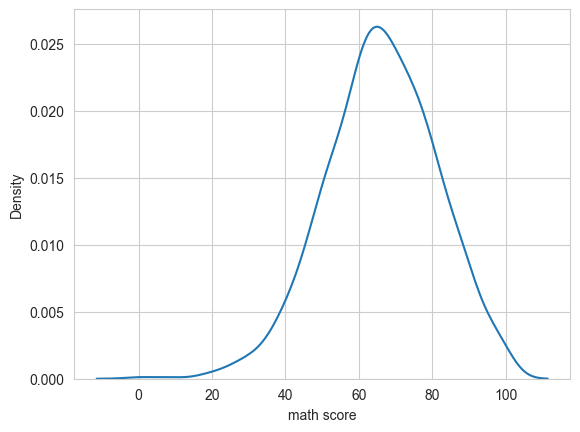

In [101]:
sns.kdeplot(df,x="math score")

<Axes: xlabel='reading score', ylabel='Density'>

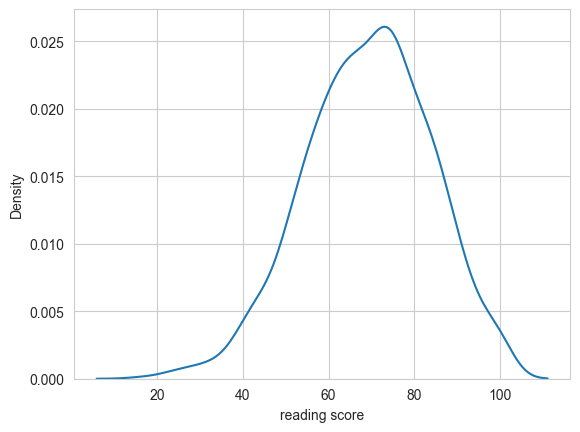

In [102]:
sns.kdeplot(df,x="reading score")

<Axes: xlabel='writing score', ylabel='Density'>

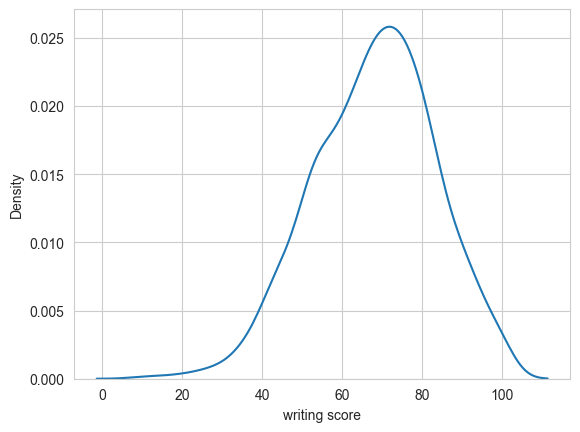

In [103]:
sns.kdeplot(df,x='writing score')

We can conclude that students having parents with Master's Degree are good performer in all 3 subjects

# Summary